In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.('congressional_voting_dataset.csv')

## Wstępna eksploracja

Z informacji podanych na https://www.apispreadsheets.com/datasets/121 dowiadujemy się, że tabela przedstawiaa informację o głosach kongresmenów w 16 różnych, kluczowych głosowaniach. Oznaczenie:
- y - kongresmen oddał głos za 
- n - głos przeciw
- ? - nie zagłosował, wstrzymał się


In [3]:
df.head()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   handicapped_infants                     435 non-null    object
 1   water_project_cost_sharing              435 non-null    object
 2   adoption_of_the_budget_resolution       435 non-null    object
 3   physician_fee_freeze                    435 non-null    object
 4   el_salvador_aid                         435 non-null    object
 5   religious_groups_in_schools             435 non-null    object
 6   anti_satellite_test_ban                 435 non-null    object
 7   aid_to_nicaraguan_contras               435 non-null    object
 8   mx_missile                              435 non-null    object
 9   immigration                             435 non-null    object
 10  synfuels_corporation_cutback            435 non-null    object
 11  educat

Tabela nie zawiera, żadnych braków informacji. Więc od razu przechodzimy do ekploracji danych. Jeszcze przed tym sprawdzając czy tabela nie zawiera, żadnych błędów.

In [5]:
df.apply(pd.unique, axis=0)

handicapped_infants                                    [n, ?, y]
water_project_cost_sharing                             [y, n, ?]
adoption_of_the_budget_resolution                      [n, y, ?]
physician_fee_freeze                                   [y, ?, n]
el_salvador_aid                                        [y, ?, n]
religious_groups_in_schools                            [y, n, ?]
anti_satellite_test_ban                                [n, y, ?]
aid_to_nicaraguan_contras                              [n, y, ?]
mx_missile                                             [n, y, ?]
immigration                                            [y, n, ?]
synfuels_corporation_cutback                           [?, n, y]
education_spending                                     [y, n, ?]
superfund_right_to_sue                                 [y, ?, n]
crime                                                  [y, n, ?]
duty_free_exports                                      [n, y, ?]
export_administration_act

In [6]:
change_dict = {"y": 1, "n": -1, "?": 0, "republican": 0, "democrat": 1 }
df.replace(change_dict, inplace=True)

Zamieniam dane typu str na numeryczne aby łatwiej je było analizować.
- -1 to głos przeciw
- 0 powstrzymanie się od głosu
- 1 głos za


W ostatniej kolumnie:
- 0 republikanin
- 1 demokrata

<function matplotlib.pyplot.show(close=None, block=None)>

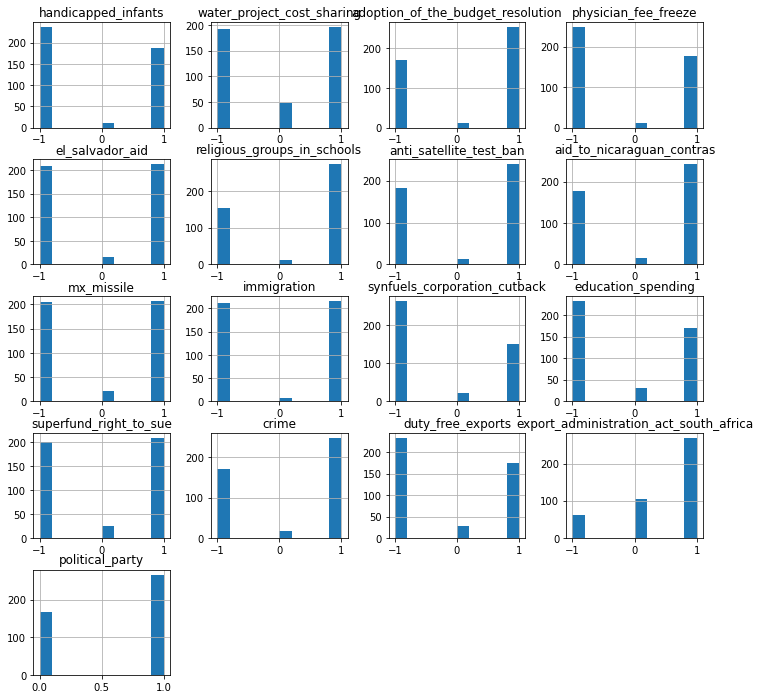

In [7]:
df.hist(figsize=(12,12))
plt.show

Co można zauważyć to, że w naszych danych jest o ok. 100 więcej demokratów. Poza dwoma głosowaniami w których była duża liczba wstrzymań od głosów to głosy rozkładają się mniej więcej równo co może wskazywać na głosowanie według partyjnych podziałów.

Zobaczmy jak rozdzielają się te głosowania które odznaczają się dużą liczbą głosów powstrzymanych. Ciekawe jest to, że głosy nie rozkładają się jasno wobec podziału na partię. A w sprawie pierwszego przedstwionego niżej głosowania wygląda jaby przynależność partyjna nie miała, żadnego znaczenia. Było to na tyle zaskakujące, że aż sprawdziłem dokładne wartości.

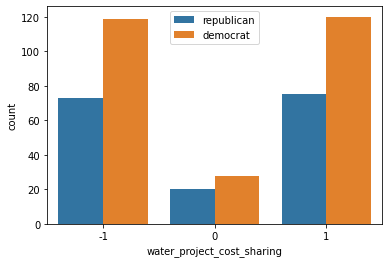

In [8]:
sns.countplot(x=df.columns[1],hue=df.columns[-1], data=df)
plt.legend(["republican", "democrat"])
plt.show()

In [9]:
gr = df.groupby(['water_project_cost_sharing', 'political_party'])['water_project_cost_sharing'].count()
gr

water_project_cost_sharing  political_party
-1                          0                   73
                            1                  119
 0                          0                   20
                            1                   28
 1                          0                   75
                            1                  120
Name: water_project_cost_sharing, dtype: int64

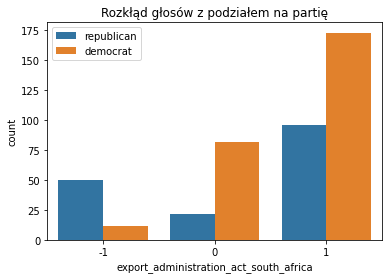

In [10]:
sns.countplot(x=df.columns[-2],hue=df.columns[-1], data=df).set_title("Rozkłąd głosów z podziałem na partię")
plt.legend(["republican", "democrat"])
plt.show()

Sprawdzam czy istnieją jakieś *outliery* które w tym wypdaku są np powstrzymywaniem się od głosu za każdym razem. Mamy jednego takiego kongresmena

In [11]:
def ff(x):
  return all(x == 0) or all(x == -1) or all(x == 1)
df[df.drop('political_party', axis=1).apply(func=ff, axis=1)]

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Ilość głosujących wegług liczby zagłosowań')

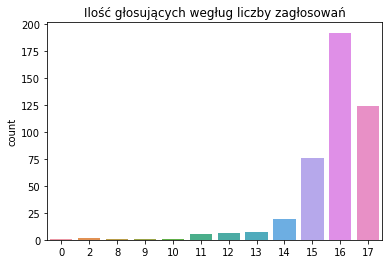

In [12]:
dfa = abs(df)
dfaa = np.apply_along_axis(sum, 1, dfa)
sns.countplot(dfaa)
plt.title("Ilość głosujących wegług liczby zagłosowań")

In [42]:
print(dfaa[dfaa < 11])


[ 2  8  2  0 10  9]


In [43]:
df[dfaa < 11]

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
107,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
129,0,0,1,-1,-1,-1,1,1,0,-1,0,0,0,0,0,0,1
183,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
295,-1,1,-1,1,1,1,0,0,-1,1,-1,1,0,0,0,0,0
377,-1,1,-1,1,1,1,0,0,-1,-1,0,0,1,0,0,0,0


## Rozkład głosów poszczególnych kongresmenów
Wykres ten miał za zadanie sprawdzić 

In [14]:
vot = df.drop('political_party', axis=1).apply(func=sum, axis=1)
vot = pd.DataFrame(data=(vot, df['political_party'])).transpose()
vot.columns.values[[0,1]] = ('vots', 'party')
vot.sort_values(by='vots', inplace=True)
vot["index"] = pd.Series(range(0, len(vot)), index=vot.index)

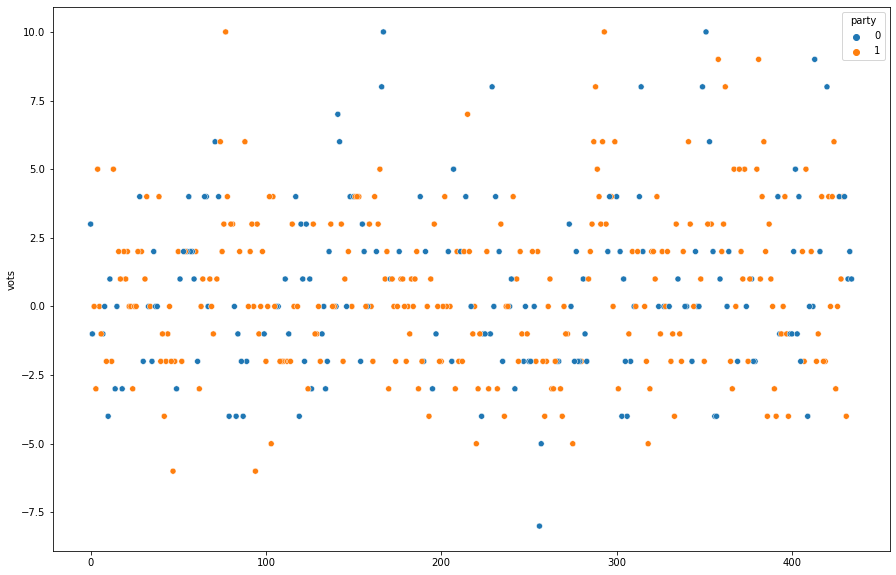

In [15]:

plt.figure(figsize=(15, 10))
sns.scatterplot(x=vot.index, y='vots', hue='party', data=vot)
#plt.legend(['republican', 'democrat'])
plt.show()

In [16]:
df.iloc[[256, 47, 94]]

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa,political_party
256,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,0
47,1,-1,1,-1,-1,-1,1,1,0,-1,-1,-1,-1,-1,-1,0,1
94,1,-1,1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1


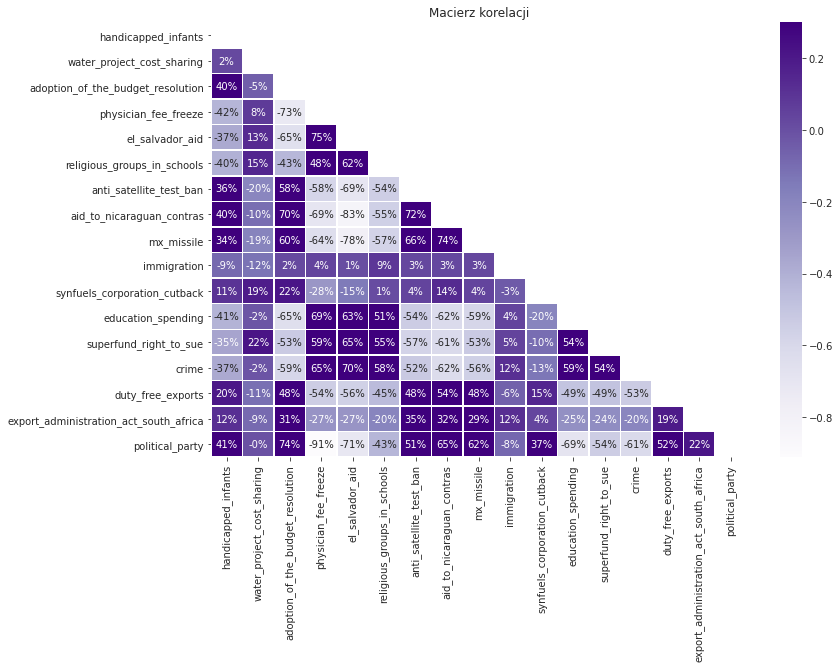

In [17]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('ticks'):
    f, ax = plt.subplots(figsize=(12,8))
    ax = sns.heatmap(df.corr(), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False,cmap='Purples')
    plt.title('Macierz korelacji')

IndexError: index 4 is out of bounds for axis 0 with size 4

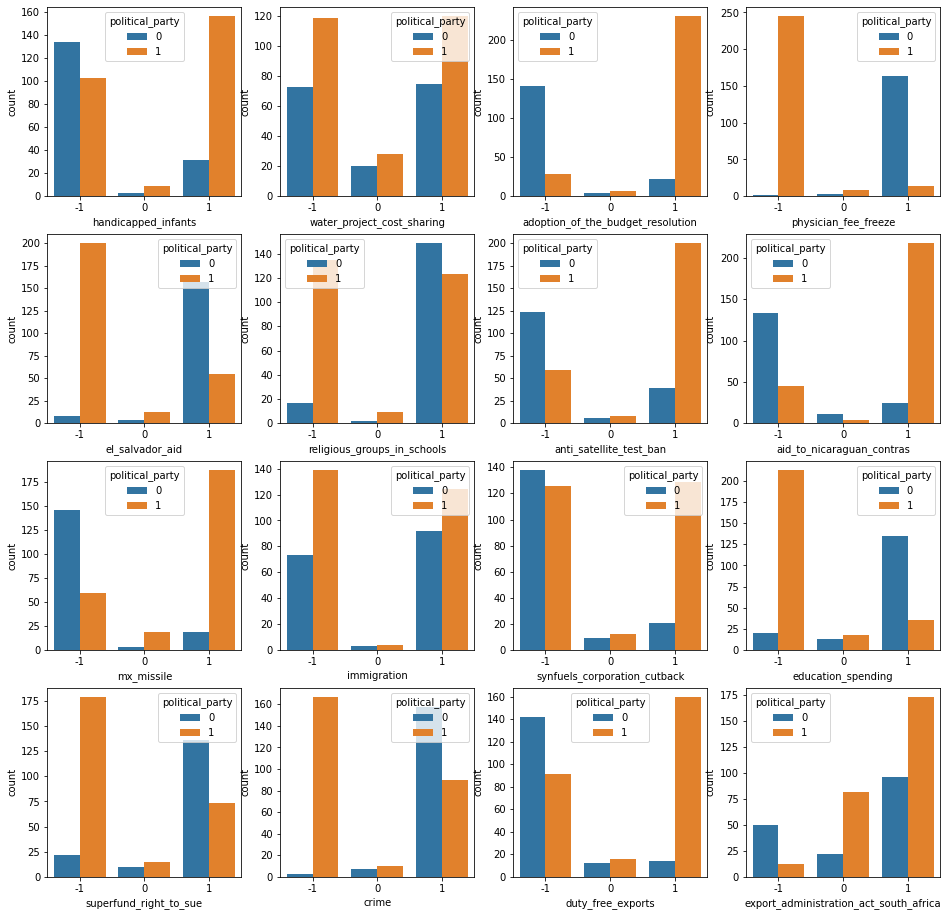

In [18]:
f, axes = plt.subplots(4,4,figsize=(16,16))

for i in range(0, len(df.columns)):
  sns.countplot(x=df.columns[i],hue=df.columns[-1], data=df, ax=axes[i//4, i%4])
plt.legend('republican', 'democrat')
plt.show()

In [19]:
def grr(x, df):
  return df.groupby([x])[x].count()

In [20]:
## Ile procent parti głosowało na każdy z pomysłów
def grra(df, k):
  dfd = df[df.political_party == k].drop('political_party', axis=1)
  l = len(dfd['handicapped_infants'])
  dfdg = pd.DataFrame()
  for i in dfd.columns:
    dfdg[i] = 100*grr(i, dfd)/l
  return dfdg

In [21]:
df_rep = grra(df, 0)
df_dem = grra(df,0)
df_rep.index

Int64Index([-1, 0, 1], dtype='int64', name='handicapped_infants')

In [22]:
df_rep

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
handicapped_infants,,,,,,,,,,,,,,,,
-1,79.761905,43.452381,84.523810,1.190476,4.761905,10.119048,73.214286,79.166667,86.904762,43.452381,82.142857,11.904762,13.095238,1.785714,84.523810,29.761905
0,1.785714,11.904762,2.380952,1.785714,1.785714,1.190476,3.571429,6.547619,1.785714,1.785714,5.357143,7.738095,5.952381,4.166667,7.142857,13.095238
1,18.452381,44.642857,13.095238,97.023810,93.452381,88.690476,23.214286,14.285714,11.309524,54.761905,12.500000,80.357143,80.952381,94.047619,8.333333,57.142857
